In [2]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [3]:
def show(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

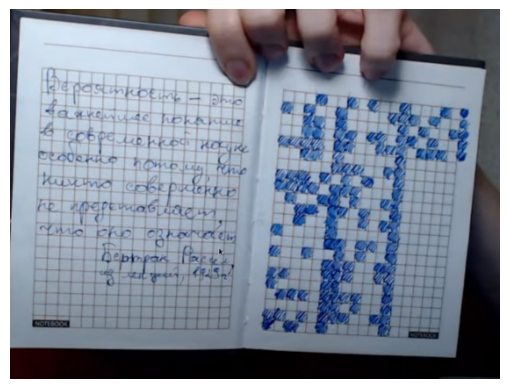

Width: 1074, Height:811


In [4]:
img = cv2.imread("grid.png")
H, W = img.shape[0], img.shape[1]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show(img)
print(f"Width: {W}, Height:{H}")


In [5]:
groundtruth = np.array([[0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1],
       [0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1],
       [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1],
       [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]])

## Corner Points

### GUI for selecting points

In [6]:
# def callback(event, x,y,flags,param):
#     if event == cv2.EVENT_LBUTTONDOWN:
#         print("Left Button Clicked at ", x, y)
#         cv2.imshow("tool", img)

# cv2.namedWindow("tool")
# cv2.setMouseCallback("tool", callback)

# while True:
#     cv2.imshow("tool", img)
#     key = cv2.waitKey(0)
#     print(key)
#     break

# cv2.destroyAllWindows()


### Draw Corners on the image

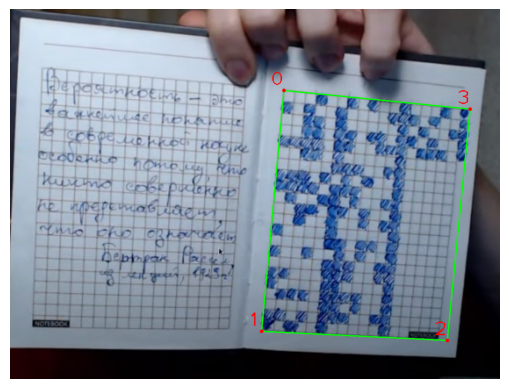

In [7]:
corners = np.array([
    [600, 178],
    [551, 706],
    [958, 726],
    [1008, 219],
])

img_drawn = img.copy()

cv2.drawContours(img_drawn, [corners], 0, (0,255,0), 2)

RADIUS = 4
for idx, corner in enumerate(corners):
    cv2.putText(img_drawn, f"{idx}", corner+np.array([-30,-10]), cv2.FONT_HERSHEY_PLAIN, 3, (255,0,0), 2)
    cv2.circle(img_drawn, corner, RADIUS, (255, 0, 0), -1)

show(img_drawn)

## Perspective Transformation

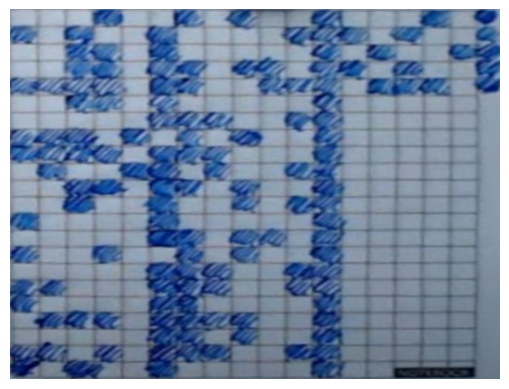

In [8]:
src_points = corners.astype(np.float32)

dest_points = np.array([
    [0,0],
    [0,H],
    [W,H],
    [W,0],
]).astype(np.float32)

transform = cv2.getPerspectiveTransform(src_points, dest_points)

img_warped = cv2.warpPerspective(img, transform, (W, H))
show(img_warped)

18x22 grid

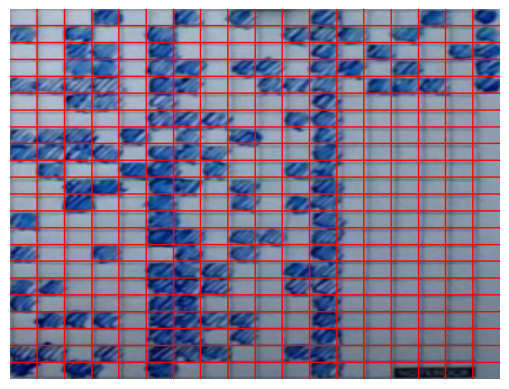

In [9]:
img_warped_drawn = img_warped.copy()
for i in range(1, 18):
    p1 = [int(W/18*i), 0]
    p2 = [int(W/18*i), H]
    cv2.line(img_warped_drawn, p1, p2, (255, 0, 0), 2)

for i in range(1, 22):
    p1 = [0, int(H/22*i)]
    p2 = [W, int(H/22*i)]
    cv2.line(img_warped_drawn, p1, p2, (255, 0, 0), 2)

show(img_warped_drawn)

## Convert to numerical values

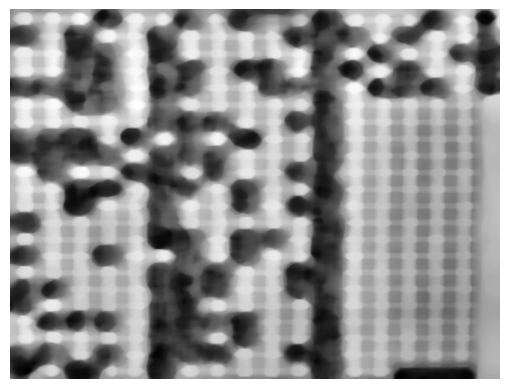

In [10]:
def process_image(img):
    result = img.copy()
    result = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
    # result = cv2.GaussianBlur(result,(31,31), 10.)
    # ret, result = cv2.threshold(result,127,255,cv2.THRESH_BINARY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    result = clahe.apply(result)
    # result = cv2.equalizeHist(result)
    # result = cv2.dilate(result, (5, 5), iterations=10)
    result = cv2.morphologyEx(result, cv2.MORPH_ERODE, (15,15), iterations=5)
    # result = cv2.GaussianBlur(result, (15,15), 10)
    result = cv2.medianBlur(result, 31)
    # thresh, result = cv2.threshold(result, 120, 255, cv2.THRESH_BINARY)
    return result

plt.imshow(process_image(img_warped), cmap="gray")
plt.axis("off")
plt.show()

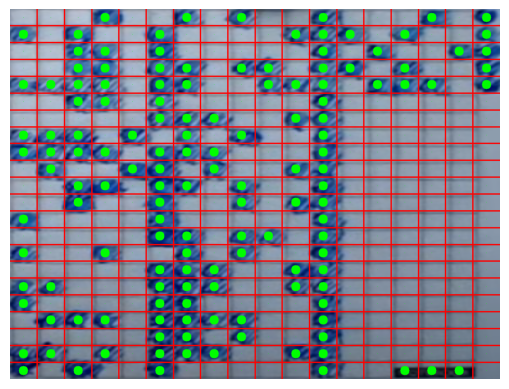

In [11]:
grid = np.zeros((22, 18))

def get_mean_around_point(img, x, y, width=30):
    width = int(W//18*0.4)
    height = int(H//22*0.4)
    return np.mean(img[y-height//2:y+height//2,x-width//2:x+width//2])

img_warped_drawn_dots = img_warped_drawn.copy()
values = []
img_warped_processed = process_image(img_warped)
# img_warped_processed = img_warped.copy()

for y in range(22):
    for x in range(18):
        px = int((x+0.5)*(W/18))
        py = int((y+0.5)*(H/22))
        value = get_mean_around_point(img_warped_processed, px, py)
        values.append(value)
        # print(value)
        radius = 10 if value<119 else 0
        grid[y,x] = value
        # radius = int(value/18)
        cv2.circle(img_warped_drawn_dots, np.array([px, py]), radius, (0, 255, 0), -1)

show(img_warped_drawn_dots)
grid_binary = (grid<119).astype(np.uint8)

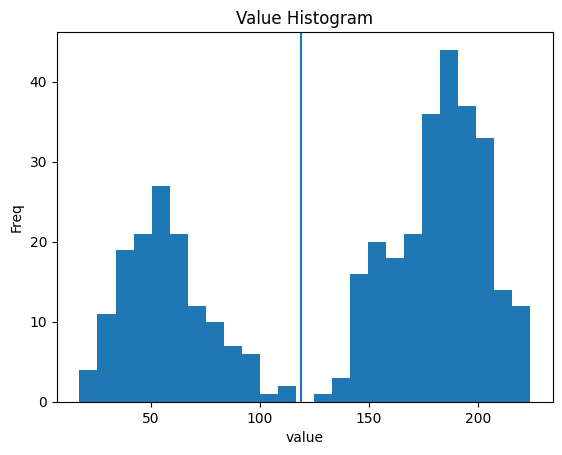

In [12]:
plt.hist(values, bins=25)
plt.title("Value Histogram")
plt.ylabel("Freq")
plt.xlabel("value")
plt.axvline(119)
plt.show()

5 0


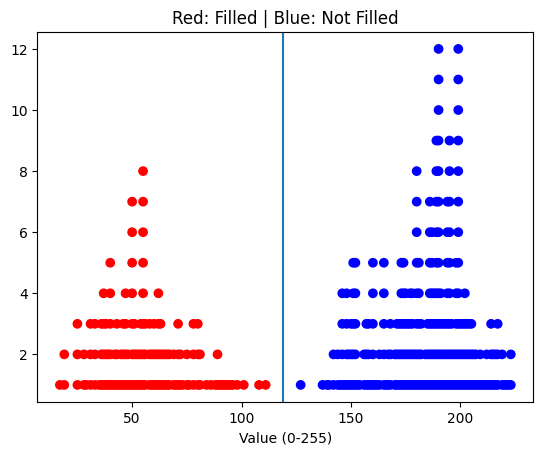

In [17]:
from collections import defaultdict

last_index = defaultdict(int)
values = []
labels = []
indices = []
for y in range(groundtruth.shape[0]):
    for x in range(groundtruth.shape[1]):
        # calculate value
        value = int(grid[y,x])
        last_index[value] += 1

        # calculate index
        index = last_index[value]

        # calculate groundtruth label
        label = groundtruth[y,x]

        values.append(value)
        indices.append(index)
        labels.append(label)

ys = [idx for idx in indices]
colors = ["r" if labels[i]==1 else "b" for i in range(len(labels))]
plt.scatter(values, ys, c=colors)
plt.axvline(119)
plt.xlabel("Value (0-255)")
plt.title("Red: Filled | Blue: Not Filled")
print(index, label)


In [14]:
grid_binary

array([[0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1],
       [0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1],
       [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1],
       [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,